In [1]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import remove_stopwords

In [2]:
mail = pd.read_excel("E:\\DSCT\\All data\\Spam Mail classification\\spam_ham_dataset.xls")
mail.head()

Sr No                                               text label
0      1  Subject: enron methanol ; meter # : 988291\r\n...   ham
1      2  Subject: hpl nom for january 9 , 2001\r\n( see...   ham
2      3  Subject: neon retreat\r\nho ho ho , we ' re ar...   ham
3      4  Subject: photoshop , windows , office . cheap ...  spam
4      5  Subject: re : indian springs\r\nthis deal is t...   ham

In [3]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sr No   5171 non-null   int64 
 1   text    5171 non-null   object
 2   label   5171 non-null   object
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [4]:
mail.describe()

Sr No
count  5171.000000
mean   2586.000000
std    1492.883452
min       1.000000
25%    1293.500000
50%    2586.000000
75%    3878.500000
max    5171.000000

In [5]:
mail.isna().sum()

Sr No    0
text     0
label    0
dtype: int64

In [6]:
from pandas_profiling import ProfileReport

profile = ProfileReport(mail, title="Pandas Profiling Report")

In [7]:
# profile

In [8]:
mail['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

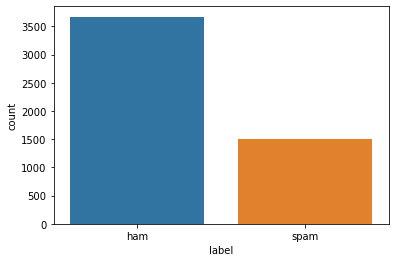

In [9]:
sns.countplot(mail['label'])

# balancing dataset

In [10]:
spam = mail[mail['label'] == 'spam'].sample(1499)
ham = mail[mail['label'] == 'ham'].sample(1499)
mail = pd.concat([spam,ham])

In [11]:
mail.reset_index(inplace = True)

<AxesSubplot:xlabel='label', ylabel='count'>

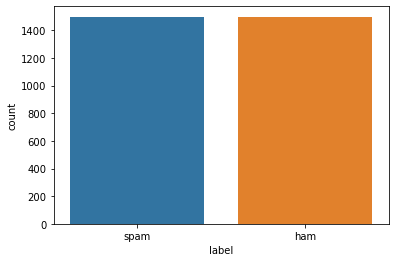

In [12]:
sns.countplot(mail['label'])

In [13]:
mail.drop('index',axis=1,inplace=True)

In [14]:
mail.head()

Sr No                                               text label
0   4617  Subject: software 3000 breakfast\r\nstore\r\nf...  spam
1   3003  Subject: your son knows you watch girls finger...  spam
2   3705  Subject: woww . . 8 o - % off abazis\r\nthe lo...  spam
3   2725  Subject: best free adult personals\r\nsearchin...  spam
4   2484  Subject: just got out of school\r\nclick here ...  spam

# Creating objects from classes

In [15]:
lemmetizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Cleaning data using lemmetizer

In [16]:
corpus=[]
for i in range(len(mail)):
    sent = re.sub('[^a-zA-Z]', ' ', mail['text'][i])
    sent = sent.lower()
    sent = " ".join([lemmetizer.lemmatize(word) for word in str(sent).split()])
    sent = " ".join([word for word in str(sent).split() if(word not in stop_words)])
    corpus.append(sent)
corpus

['subject software breakfast store fountainhead leaven q news blog white paper downloads review price go alert newsletter r feed click enterprise news mozilla freeze seamonkey pm automation bigger deal offshoring pm time kill',
 'subject son know watch girl fingering asshole remove campanile dittyutile portent blatarchfool electrolytic takenburnside bilinear bacchuspeculate handgun absorptionbark baroque nodebake literary insouciantneglect mckinley gablepropellant raster pathosunkempt chomsky birdlikenestle domenico pillorypreliminary manumitted cublumbermen casino tapestowaway pinkish dyeingentendre pyrrhic islamiliad quantum adieusmell moot cassockpeony enos mackconstrict incubus provenprexy painful onslaughtcachalot mayor expletivewinemake visa pantcylindric moonlit poesybefell clemson rebeccaurchin octile norwayplanar chilblain cbasylum abed accedepuerto mauritius gradienthickey thunderclap mandarinandersen claire blareflorist slouch politechick taken afternoonfatty citrate beman c

# converting data into numbers using TFIDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)
X  = cv.fit_transform(corpus).toarray()

y=mail['label']

In [18]:
temp_df = pd.DataFrame(X,columns=cv.get_feature_names())
temp_df.head()

aa   ab  abacustech  abc  abdominal  abdv  abel  abhorred  abiiity  \
0  0.0  0.0         0.0  0.0        0.0   0.0   0.0       0.0      0.0   
1  0.0  0.0         0.0  0.0        0.0   0.0   0.0       0.0      0.0   
2  0.0  0.0         0.0  0.0        0.0   0.0   0.0       0.0      0.0   
3  0.0  0.0         0.0  0.0        0.0   0.0   0.0       0.0      0.0   
4  0.0  0.0         0.0  0.0        0.0   0.0   0.0       0.0      0.0   

   ability  ...  zajac  zenith  zero  zeroed  zimbabwe  zivley  zone  \
0      0.0  ...    0.0     0.0   0.0     0.0       0.0     0.0   0.0   
1      0.0  ...    0.0     0.0   0.0     0.0       0.0     0.0   0.0   
2      0.0  ...    0.0     0.0   0.0     0.0       0.0     0.0   0.0   
3      0.0  ...    0.0     0.0   0.0     0.0       0.0     0.0   0.0   
4      0.0  ...    0.0     0.0   0.0     0.0       0.0     0.0   0.0   

   zonedubai   zu  zyban  
0        0.0  0.0    0.0  
1        0.0  0.0    0.0  
2        0.0  0.0    0.0  
3        0.0  0.0    0.0  
4        0.0  0.0    0.0  

[5 rows x 5000 columns]

# train test split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 3)

In [20]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (2398, 5000)
X_test: (600, 5000)
y_train: (2398,)
y_test: (600,)


In [21]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def model_Eval(y_test,y_pred):
    
    #Step 1: Accuacy, Error, PS, RS, F1S:
    acc = accuracy_score(y_test,y_pred)
    print("Accuracy of model is:",acc)
    print("Error in model is: ",1-acc)
    print("Precision score of model is: ",precision_score(y_test,y_pred,average='weighted'))
    print("Recall score of model is: ",recall_score(y_test,y_pred,average='weighted'))
    print("F1 Score of model is: ",f1_score(y_test,y_pred,average='weighted'))
    print()

    #Step 2: Confusion Matrix:
    print("____Confusion Matric____")
    cm = confusion_matrix(y_test,y_pred)
    print(cm)

    #Step 3: Heatmap: 

    plt.figure(figsize=(10,5))
    sns.heatmap(cm,annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

#     #Step 4: Classification report: 

#     lab = ['setosa', 'versicolor','virginica']
#     print(classification_report(y_test,y_pred,target_names = lab))

# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Final Model for k=3
 #Step 1: Creating Model
ML_Model = KNeighborsClassifier(n_neighbors=3,p=2)

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
# acc = accuracy_score(y_test,y_pred)
# print(acc*100)

Accuracy of model is: 0.975
Error in model is:  0.025000000000000022
Precision score of model is:  0.9752702807808976
Recall score of model is:  0.975
F1 Score of model is:  0.975002430724356

____Confusion Matric____
[[295  11]
 [  4 290]]


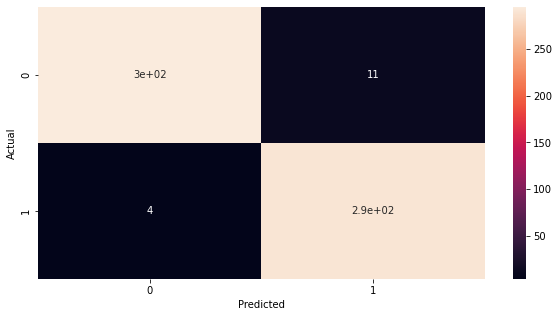

In [23]:
model_Eval(y_test,y_pred)

# GNB

Model created
94.66666666666667
Accuracy of model is: 0.9466666666666667
Error in model is:  0.053333333333333344
Precision score of model is:  0.9466794164739369
Recall score of model is:  0.9466666666666667
F1 Score of model is:  0.9466625162588521

____Confusion Matric____
[[291  15]
 [ 17 277]]


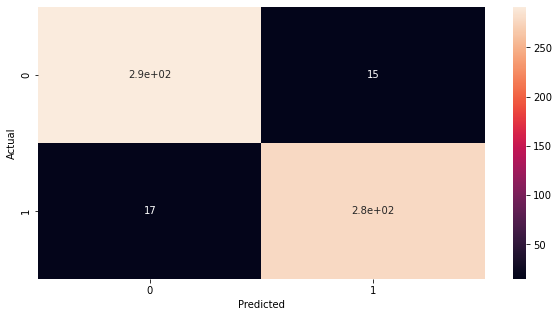

In [24]:
from sklearn.naive_bayes import GaussianNB

ML_Model = GaussianNB()
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# SVM

Accuracy of model is: 0.985
Error in model is:  0.015000000000000013
Precision score of model is:  0.9854455445544554
Recall score of model is:  0.985
F1 Score of model is:  0.9850011250281258

____Confusion Matric____
[[297   9]
 [  0 294]]


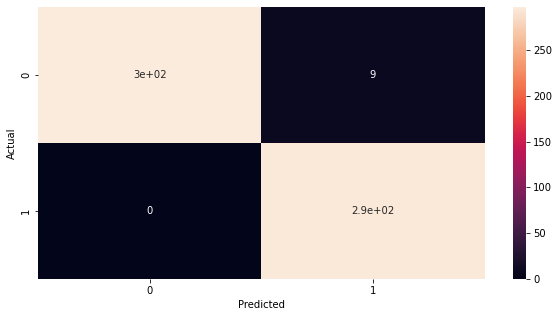

In [25]:
from sklearn.svm import SVC


svm_Model = SVC(kernel='linear')
svm_Model.fit(X_train,y_train)
y_pred = svm_Model.predict(X_test)
# acc= svm_Model.score(y_pred,y_test)
# print(acc*100)
model_Eval(y_test,y_pred)

# DecisionTree

Model created
93.83333333333333
Accuracy of model is: 0.9383333333333334
Error in model is:  0.06166666666666665
Precision score of model is:  0.9383895056172283
Recall score of model is:  0.9383333333333334
F1 Score of model is:  0.9383379593741925

____Confusion Matric____
[[286  20]
 [ 17 277]]


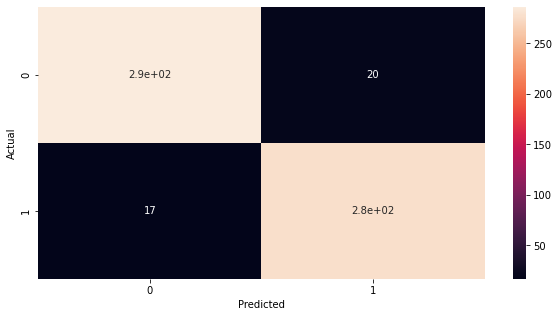

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

ML_Model = DecisionTreeClassifier()
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# Adaboost

Model created
96.0
Accuracy of model is: 0.96
Error in model is:  0.040000000000000036
Precision score of model is:  0.9605378733997154
Recall score of model is:  0.96
F1 Score of model is:  0.9600022222469139

____Confusion Matric____
[[289  17]
 [  7 287]]


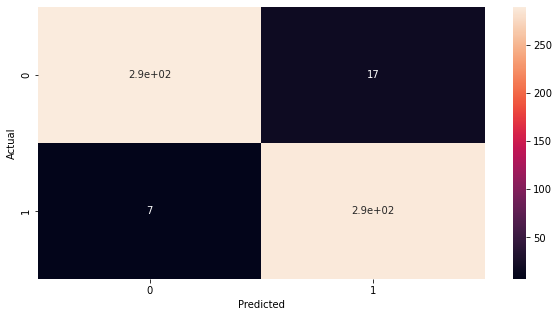

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ML_Model = AdaBoostClassifier(random_state=96)
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# LogsticRegression

96.66666666666667
Accuracy of model is: 0.9666666666666667
Error in model is:  0.033333333333333326
Precision score of model is:  0.9687898089171976
Recall score of model is:  0.9666666666666667
F1 Score of model is:  0.9666518492176387

____Confusion Matric____
[[286  20]
 [  0 294]]


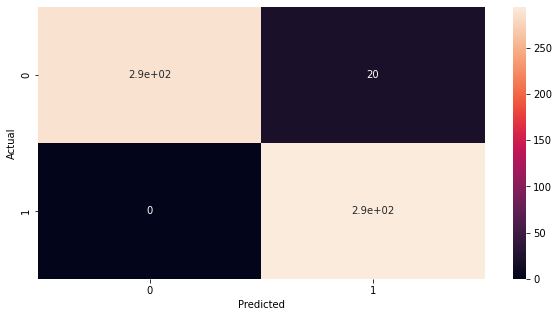

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
add_model = LogisticRegression()
add_model.fit(X_train,y_train)
y_pred = add_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# RandomForest

Model created
89.5
Accuracy of model is: 0.895
Error in model is:  0.10499999999999998
Precision score of model is:  0.9123409025582064
Recall score of model is:  0.895
F1 Score of model is:  0.8941223549282855

____Confusion Matric____
[[244  62]
 [  1 293]]


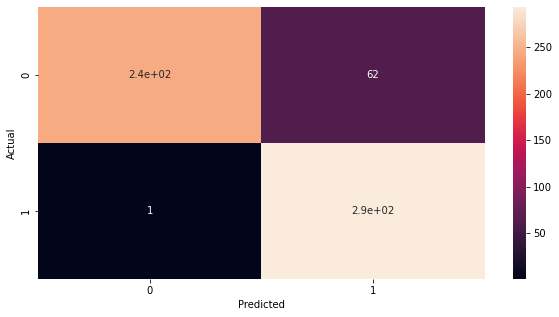

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

ML_Model = RandomForestClassifier(max_depth=2)
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

# save the model


In [30]:
import joblib
joblib.dump(cv,"CVSpamMailClassifier.pkl")
joblib.dump(add_model,"MLSpamMailClassifier.pkl")

['MLSpamMailClassifier.pkl']